# SET UP

In [1]:
import os
import librosa
import numpy as np
import soundfile as sf
from os import path
from pydub import AudioSegment
from matplotlib import pyplot as plt
from pathlib import Path

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# files                                                                         
src = "C:\coffee\sound_data\interview\interview1.mp3"
dst = "C:/coffee/sound_data/interview/test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

저장할 Directory 지정

In [15]:
wav = 'C:/coffee/sound_data/cafa_noise_0.wav'
(file_dir, file_id) = os.path.split(wav)
print("file_dir:", file_dir)
print("file_id:", file_id)

file_dir: C:/coffee/sound_data
file_id: cafa_noise_0.wav


※ librosa.load는 .wav 확장자만 취급한다. 나는 유튜브 음원추출을 이용해 mp3형태로 받아서 처음에 오류를 겪었다.
간단하게 wav형태로 변환하면 해결되는 문제지만 wav의 용량이 mp3보다 크기때문에 데이터 용량의 문제가 있다.

sampling rate 는 기본값은 22500 이고 이번에는 16000으로 설정해 주었다

In [16]:
y,sr = librosa.load(wav,sr=16000)

y를 그래프로 확인

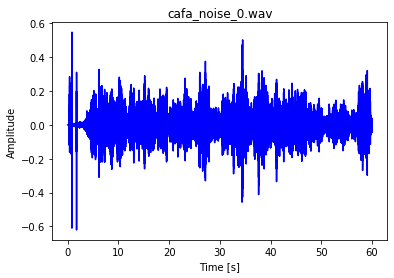

In [17]:
time = np.linspace(0, len(y)/sr, len(y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
plt.savefig(file_id+'.png')
plt.show()

10초씩 짤라서 그래프모양을 확인해 보면 아래와 같다

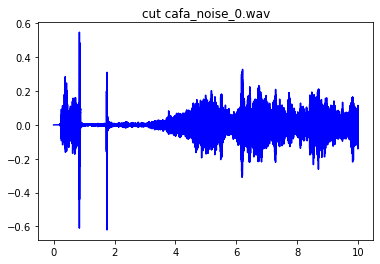

0 160000
0


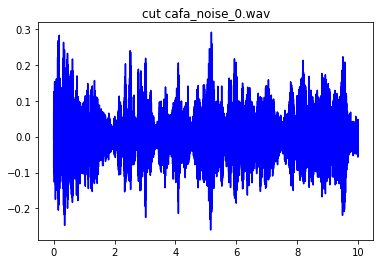

160000 320000
1


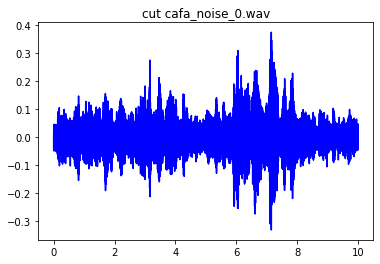

320000 480000
2


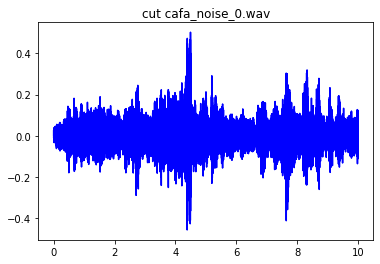

480000 640000
3


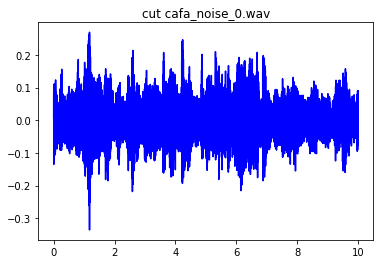

640000 800000
4


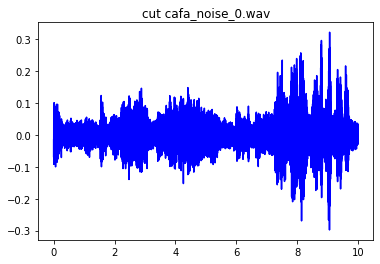

800000 960000
5


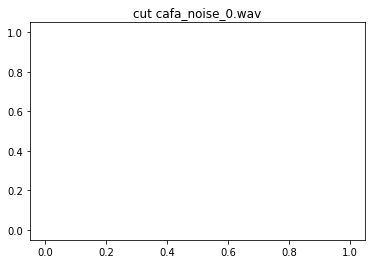

960000 1120000
6


In [18]:
start = 0
end = sr*10
Interval = sr*10

for i in range(int((len(y)/Interval+1))):
    y2 = y[start:end:]
    
    time2 = np.linspace(0, len(y2)/sr, len(y2))
    fig2, ax2 = plt.subplots()
    ax2.plot(time2, y2, color = 'b', label='speech waveform')
    ax1.set_ylabel("Amplitude") # y 축
    ax1.set_xlabel("Time [s]") # x 축
    plt.title('cut '+file_id)
    plt.savefig('cut_half '+file_id+'.png')
    plt.show()
    
    print(start,end)    
    start += Interval
    end += Interval
    
    print(i)
    output_dir = 'C:/coffee/sound_data/cafe_noise_' + str(i) + '.wav'
    sf.write(output_dir, y2, sr, format='WAV', endian='LITTLE', subtype='PCM_16') # 깨지지 않음

In [18]:
#1분씩 자르기

#파일개수 n
n = 7

for i in range(n):

    wav = 'C:/coffee/sound_data/interview/interview'+str(i+1)+'.wav'
    y,sr = librosa.load(wav,sr=16000)

    start = 0
    end = sr*60
    Interval = sr*60

    for j in range(int((len(y)/Interval+1))):
        y2 = y[start:end:]    
        start += Interval
        end += Interval
    
        print(j)
        output_dir = 'C:/coffee/sound_data/interview/interview_minute/interview_minute_'+str(i)+'_' + str(j) + '.wav'
        sf.write(output_dir, y2, sr, format='WAV', endian='LITTLE', subtype='PCM_16') # 깨지지 않음

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [19]:
#1분씩 자르기

#파일개수 n
n = 7

for i in range(n):

    wav = 'C:/coffee/sound_data/interview/interview'+str(i+1)+'.wav'
    y,sr = librosa.load(wav,sr=16000)

    start = 0
    end = sr*10
    Interval = sr*10

    for j in range(int((len(y)/Interval+1))):
        y2 = y[start:end:]    
        start += Interval
        end += Interval
    
        print(j)
        output_dir = 'C:/coffee/sound_data/interview/interview_second/interview_second_'+str(i+1)+'_' + str(j) + '.wav'
        sf.write(output_dir, y2, sr, format='WAV', endian='LITTLE', subtype='PCM_16') # 깨지지 않음

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
2